### Recusive Blocking
Implement a solver for the equation 
$$LX=Y$$
where $L∈R^{n×n}$ is a given lower left triangular matrix, $Y∈R^{n×m}$ is the given righthand side, and $X∈R^{n×m}$ is the unknown matrix. These can be interpreted as solving $m$ linear systems for the column vectors of $X$ and $Y$. Your function may overwrite the right hand side matrix $Y$ by the solution. Implement the function by recusive blocking, and utilizie fast library functions for matrix-matrix and matrix-vector operations. You may use Python (numpy) or C++ with one of the matrix libraries from Ex 20.  What floating-point rate do you obtain? How big systems (with n=m) can you solve within 10 sec?

$$ \left(\begin{array}{cc} 
L_{11} & 0 \\
L_{21} & L_{22}\\
\end{array}\right) \left(\begin{array}{c} 
x_1 \\
x_2\\
\end{array}\right) = \left(\begin{array}{c} 
b_1 \\
b_2\\
\end{array}\right)
$$

1. Solve $L_{11} x_1 = b_1$
2. Calculate $r = b_2 - L_{21} x_1$
3. Solve $L_{22} x_2 = r$

The steps 1. and 3. are problems of half the size and 2. is a matrix-matrix-product which can be calculated efficiently using good libraries.



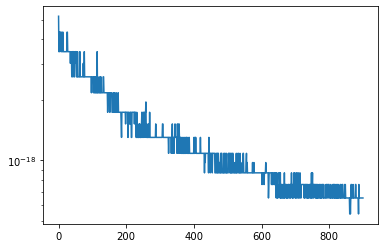

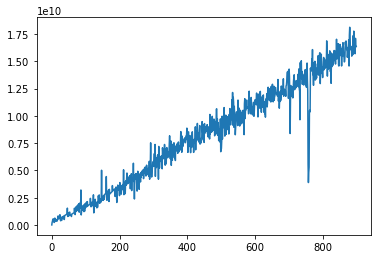

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import time

def recursive_blocking(L, B, n0, n1, n2):
    # 1. solve L11 x1 = b1

    # is L11 already a scalar?
    if n1 - n0 == 1:
        L[n0, :] = B[n0, :] / L[n0, n0]
    else:
        # split the L matrix
        split_idx = (n1 - n0) // 2
        recursive_blocking(L, B, n0, n0+split_idx, n1)

    # 2. calculate r = b2 - L21 x1
    r = B[n1:n2, :] - L[n1:n2, n0:n1] @ L[n0:n1]
    B[n1:n2, :] = r

    # 3. solve L22 x2 = r

    # is L22 already a scalar?
    if n2 - n1 == 1:
        L[n1, :] = r / L[n1, n1]
    else:
        # split the L matrix
        split_idx = (n2 - n1) // 2
        recursive_blocking(L, B, n1, n1 + split_idx, n2)


def recursive_blocking_solver(L, B):
    # LX = B
    # L [n x n]
    # X [n x m]
    # B [n x m]
    n, m = L.shape

    recursive_blocking(L, B, 0, n//2, n)
    return L


error_list = []
flop_list = []
for n in range(100, 1000):

    L = np.tril(np.random.rand(n, n)) + n*np.eye(n)
    B = np.random.rand(n, n)

    X_comp = np.linalg.solve(L, B)
    
    start_time = time.time_ns() 
    X = recursive_blocking_solver(L, B)
    end_time = time.time_ns()
    
    dt = end_time - start_time
    
    error_list.append(np.max(X_comp - X))
    flop_list.append((n**3+n) / dt * 1e9)
    
    
plt.figure()
plt.plot(error_list)
ax = plt.gca()
ax.set_yscale('log')

plt.figure()
plt.plot(flop_list)
ax = plt.gca()

In [51]:
n = 9000
L = np.tril(np.random.rand(n, n)) + n*np.eye(n)
B = np.random.rand(n, n)

start_time = time.time() 
X = recursive_blocking_solver(L, B)
end_time = time.time()

dt = end_time - start_time
print(dt)

9.990833044052124
